[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module2_Files/CA_Housing_Regression.ipynb)

# NN Regression for CA Housing
-------------------------------------
**Dr. Dave Wanik - University of Connecticut**

Let's go over a very basic notebook re: neural networks for regression using the CA Housing dataset (toy data).

# Set up your environment
Import modules, read data, explore data, data types, missing values etc.

In [ ]:
# mount your drive on the left if needed

In [ ]:
# import modules
# for general data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for data prep
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

## Read from Google Drive with shareable link

In [ ]:
# # https://drive.google.com/file/d/14cZCdu5PFog3RGcl_oryU9X8k0zQmeSS/view?usp=sharing
# !gdown 14cZCdu5PFog3RGcl_oryU9X8k0zQmeSS

Downloading...
From: https://drive.google.com/uc?id=14cZCdu5PFog3RGcl_oryU9X8k0zQmeSS
To: /content/CAhousing.csv
100% 1.42M/1.42M [00:00<00:00, 38.3MB/s]


In [ ]:
# df = pd.read_csv('CAhousing.csv')
# df.shape # 20640 rows and 10 columns

(20640, 10)

In [ ]:
# Link to the data file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module2_Files/CAhousing.csv"

# retrieve the CSV data and build a dataframe
df = pd.read_csv(url)

df.shape # 20640 rows and 10 columns

(20640, 10)

## Mount and read from Google Drive
CAHousing data is also part of the toy data from Google Colab - you can point to these data directly if you would like!

In [ ]:
# # read in our dataset
# df = pd.read_csv('/content/drive/My Drive/OPIM 5509/Module 2: Dense Neural Networks/Data/CAhousing.csv')
# # download the dataset here: https://www.kaggle.com/camnugent/california-housing-prices

# EDA
Make sure you address any missing values before modeling, otherwise you will get an error! The loss values will be `NaN` if you try to build on model on dirty data with missing values.

## Variable data types

In [ ]:
# we can see that there are a few missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Missing Values

In [ ]:
# drop any rows with missing values
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Categorical data
Delete it or recode it to dummy variables!
* https://www.marsja.se/how-to-use-pandas-get_dummies-to-create-dummy-variables-in-python/

Lots of nice examples here.

In [ ]:
# check out ocean prox
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# Creating dummy variables from one column:
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
df.shape

(20433, 14)

In [ ]:
# #  delete character column
# del df['ocean_proximity']
# df.info()

# Prepare data for modeling
Split into X and y, minmax scaler (fit on X_train and apply to X_test)

In [ ]:
# we know our target variable is 'median_house_value'
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)
print(X.shape, y.shape)

(20433, 13) (20433,)


In [ ]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [ ]:
# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16346, 13) (4087, 13) (16346,) (4087,)


In [ ]:
# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# Build, compile, fit model
Use the Sequential API to build your model; specify an optimizer (rmsprop or adam) and a loss function (mse or mae); then fit your model (make a new variable called 'history' so you can evaluate the learning curves). We'll use EarlyStopping callbacks to prevent overfitting (patience of 5).

In [ ]:
# rather than hardcoding the input shape, I like to use this instead - more elegant
# helps you hack/copy paste your code later on
X_train.shape[1]

13

Don't forget an activation function in each layer!
* `relu` in the dense layers to recode negative numbers to 0 (introduces nonlinearity which is so important!)
* `linear` (default) in the output layer so that output can range from -Inf to Inf

## Build

In [ ]:
# build the model!
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                700       
                                                                 
 dense_9 (Dense)             (None, 25)                1275      
                                                                 
 dense_10 (Dense)            (None, 10)                260       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2246 (8.77 KB)
Trainable params: 2246 (8.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ... visualize...

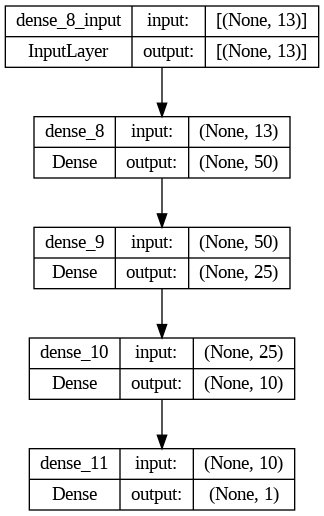

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install keras-visualizer

In [ ]:
from keras_visualizer import visualizer
# look left! graph.png in local folder
visualizer(model, file_format='png', view=True)

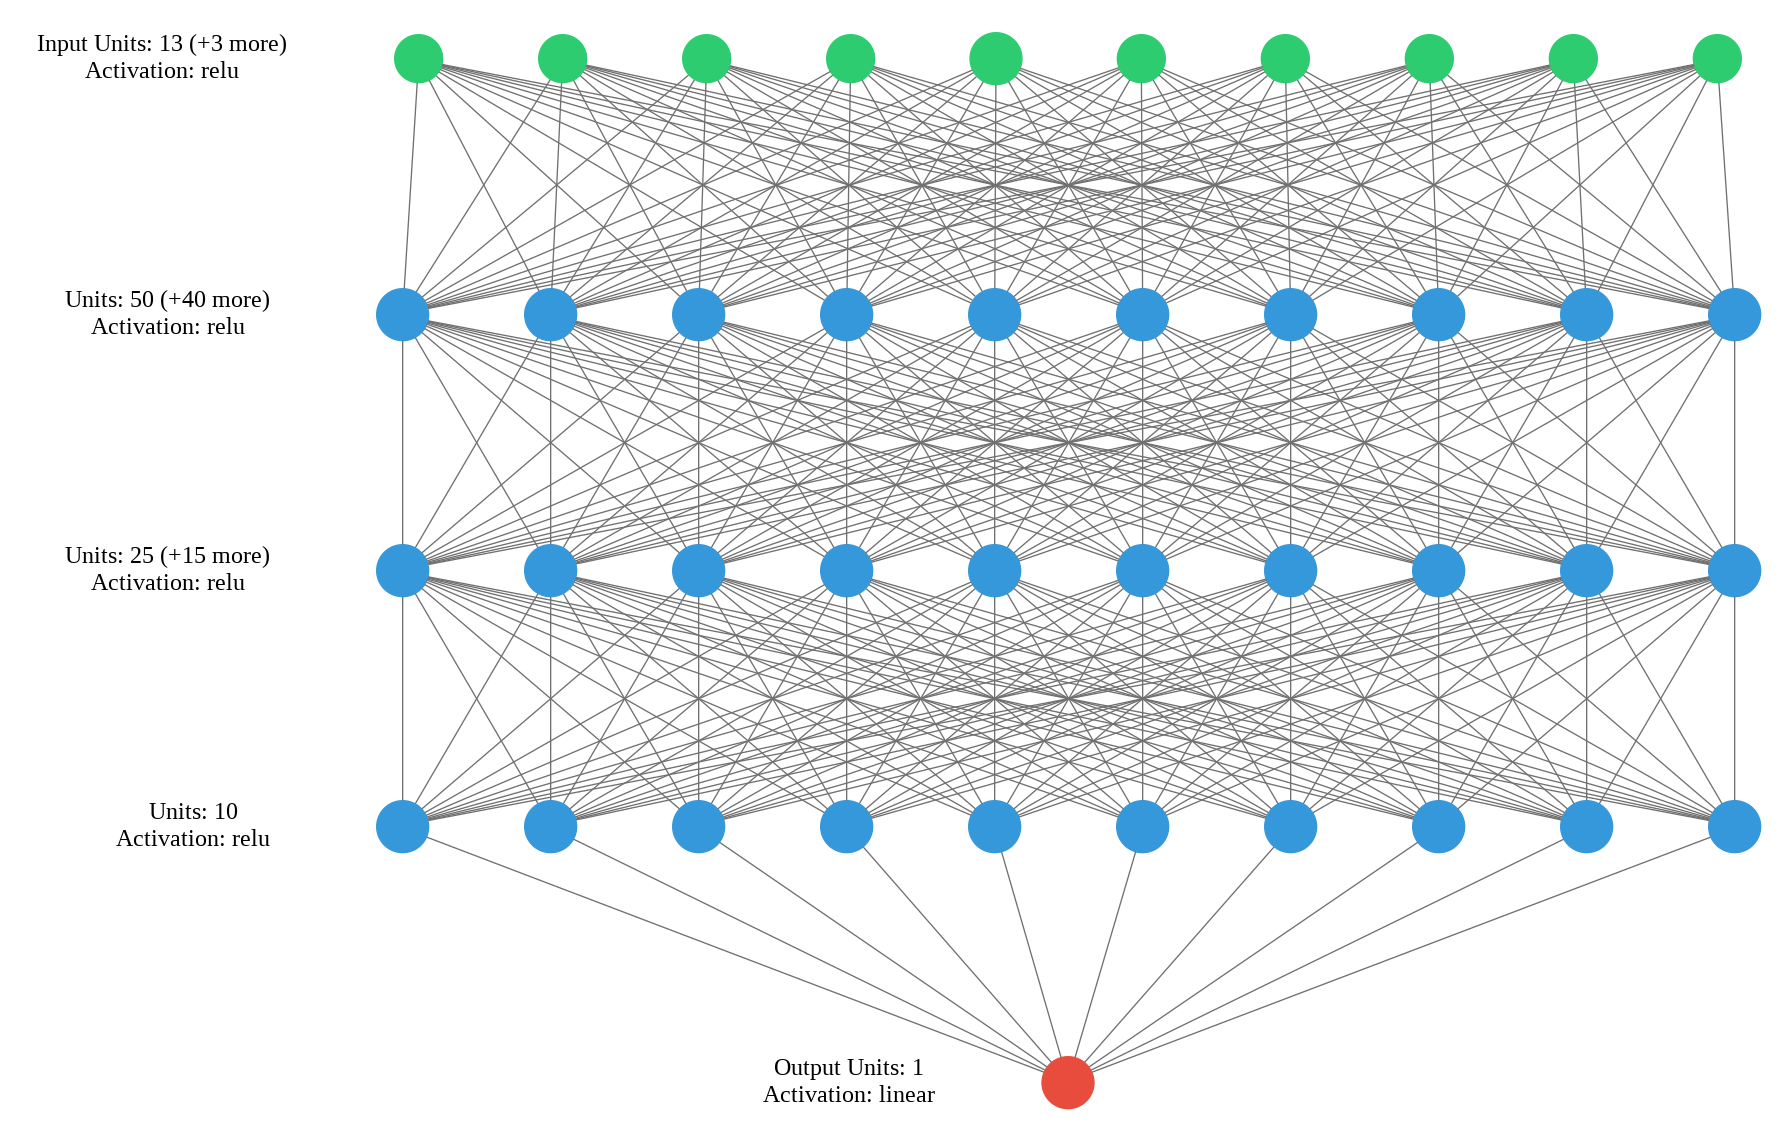

In [ ]:
# view it
from IPython.display import Image

# 'graph.png' in the left-hand side folder icon

image_path = 'graph.png'



# Display the image in the notebook

Image(filename=image_path)

## Compile
Choose your optimizer, loss function to minimize, and the metrics you'd like to track while training!
* optimizer (more here: https://keras.io/api/optimizers/):
  * SGD
  * RMSprop
  * Adam
  * Adadelta
* loss (more here: https://keras.io/api/losses/):
  * MeanSquaredError
  * MeanAbsoluteError
  * MeanAbsolutePercentageError
  * MeanSquaredLogarithmicError
* metrics (optional to use, more here: https://keras.io/api/metrics/regression_metrics/):
  * same as metrics listed for loss function

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Callbacks/Early Stopping
This is optional, but you should use this early stopping callback! It prevents you from overfitting or underfitting and returns the best weights... why wouldn't you do this every time?!

In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5, # you can choose a big value!
                   restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

## Fit the model
And save the output in the variable called `history` so you can plot the loss curves and monitor model training.

A quick note on validation data - the code below specifies a validation dataset to monitor while you are training. I often find that companies prefer you to use the `validation_split` parameter with `shuffle=True` and then test the model on the holdout data. This way you don't have a pulse on how the model would fit on the test data - looks less like data leakage.

In [ ]:
# # resets names in the model summary
# from keras import backend as K
# K.clear_session()

In [ ]:
# fit the model!
# remember, assign it to a new variable called 'history' in case
# we want to look at the learning curves

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es], # early stopping callbacks
                    epochs=5000, # set this to a big number
                    batch_size=50, # this is a hyperparameter
                    shuffle=True, # it's a best practice to shuffle your data
                    verbose=1) # this prints the output as the model trains

Epoch 1/5000
327/327 [==============================] - 3s 5ms/step - loss: 56279855104.0000 - mae: 206956.0781 - val_loss: 54572466176.0000 - val_mae: 204344.2188
Epoch 2/5000
327/327 [==============================] - 2s 6ms/step - loss: 54506176512.0000 - mae: 202645.2656 - val_loss: 50771427328.0000 - val_mae: 194942.3125
Epoch 3/5000
327/327 [==============================] - 2s 5ms/step - loss: 47020023808.0000 - mae: 183344.9219 - val_loss: 39118139392.0000 - val_mae: 162836.1406
Epoch 4/5000
327/327 [==============================] - 2s 6ms/step - loss: 30851762176.0000 - mae: 135309.9375 - val_loss: 20030869504.0000 - val_mae: 102108.5547
Epoch 5/5000
327/327 [==============================] - 2s 6ms/step - loss: 14529031168.0000 - mae: 88973.2109 - val_loss: 11038619648.0000 - val_mae: 82919.2188
Epoch 6/5000
327/327 [==============================] - 2s 5ms/step - loss: 11098417152.0000 - mae: 83605.7734 - val_loss: 10136906752.0000 - val_mae: 79492.3594
Epoch 7/5000
327/327

If you needed your model to run faster with the same architecture... just up the batch size! Upping or shrinking the batch size may or may not help your model find the optimal weights. And if you run this code twice, you will get two different models and two different sets of results due to the random initialization of the weights.

# Evaluate the Model
Learning curves, scatterplots and regression error metrics.

## Learning Curve (loss vs. epochs)

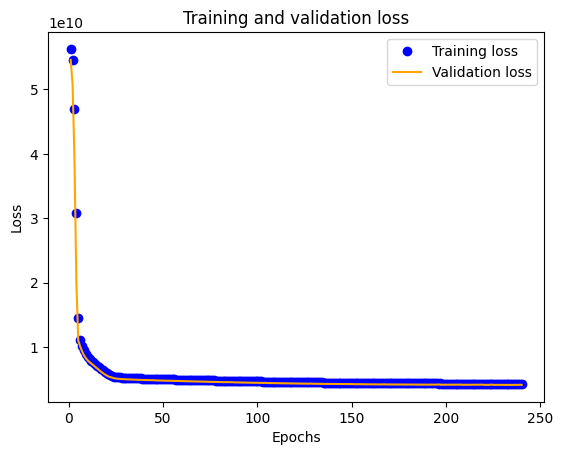

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This model seemed to converge around 50 epochs without dropout.

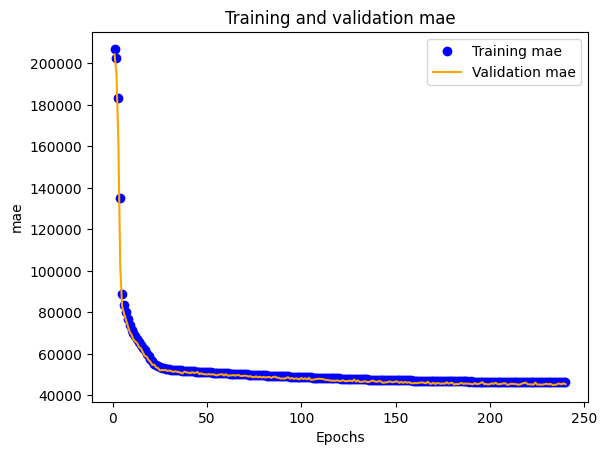

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

## Scatterplots of actual vs. predicted

128/128 [==============================] - 0s 1ms/step


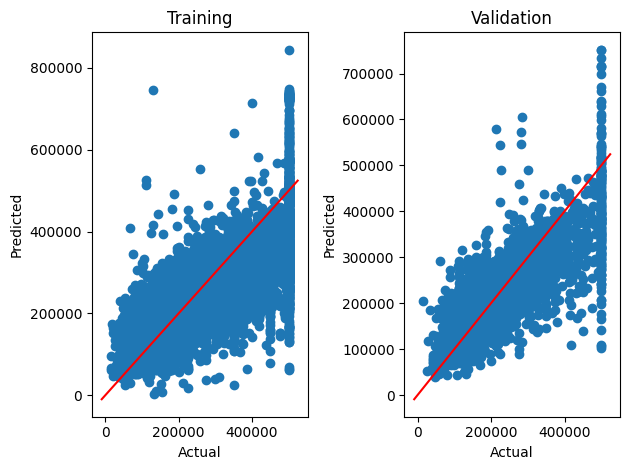

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

## Model Evaluation Metrics

In [ ]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

511/511 [==============================] - 1s 1ms/step
46027.59372039724
45070.93113071936


# Dropout
Read this: http://primo.ai/index.php?title=Dropout

Adding dropout layers between the dense layers is a great idea! Maybe our model will fit more gradually and will learn the dataset more completely.


Try values of 0.1 vs. 0.5 vs. 0.9 for dropout - how does the model do? You can copy and paste this above and re-run.



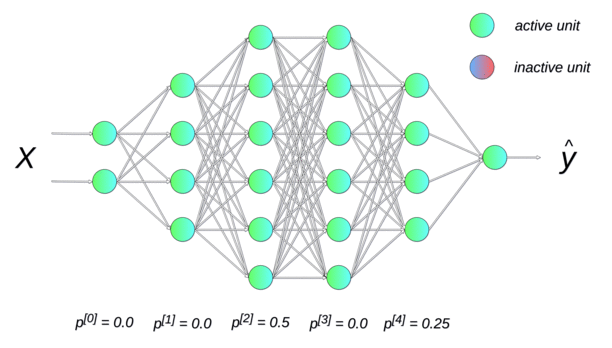

A value of 0.5 turns off half of the nodes in the hidden unit - which means half of the information makes it to the next layer, and only up to half of the weights will be updated! Similarly, a dropout value of 0.25 turns off 25% of the information. A value of 0 means there is no dropout.

In [ ]:
# now go back up and add dropout to your model and watch
# how the learning curve changes!

# previous model had MAE of 35000 and took 185 epochs
# how does dropout (0.2) help? MAE of 37000 and took 170 epochs... maybe a more gradual learning curve?
# how does dropout (0.9) help? MAE of 45000 and took 238 epochs... more sophistication didn't help our model -
# could have just stuck with the simpler architecture.
# you may get different results due to different random weights at initialization.

In [ ]:
# resets names in the model summary
from keras import backend as K
K.clear_session()

In [ ]:
# build the model!
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

Feel free to try updating the architecture at the top with dropout and patience (early stopping) and see how low of an MAE you can get!

# On Your Own
Remember that there are no trainable parameters in the dropout layer!